### <span style = 'color:purple'>**Polynomial Linear Regression** </span>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x ^2 + 0.9x +2


In [4]:
print(y.shape)


(200, 1)


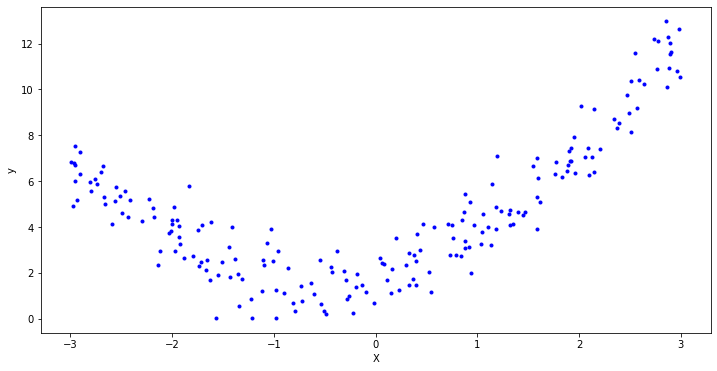

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)


In [7]:
# Applying Linear regression
lr = LinearRegression()


In [8]:
lr.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)


0.28207883444133475

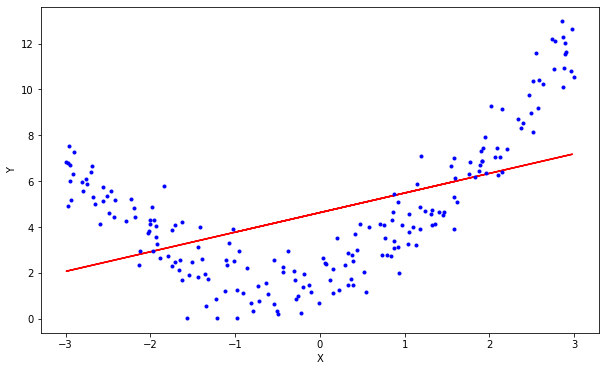

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [11]:
# Applying Polynomail Linear Regression
#  degree 2
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)


In [12]:
print(X_train[0])
print(X_train_trans[0])


[1.61189486]
[1.         1.61189486 2.59820504]


In [13]:
# include_bias parameter


In [14]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)


LinearRegression()

In [15]:
y_pred = lr.predict(X_test_trans)


In [16]:
r2_score(y_test, y_pred)


0.9069967965352638

In [17]:
print(lr.coef_)
print(lr.intercept_)


[[0.         0.93808311 0.85212785]]
[2.01414595]


In [18]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


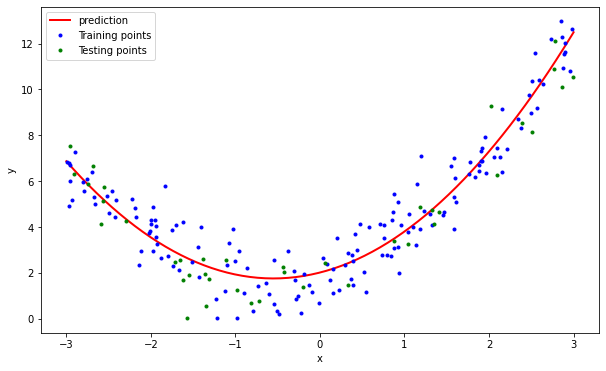

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(X_new, y_new, "r-", linewidth=2, label="prediction")
plt.plot(X_train, y_train, "b.", label="Training points")
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [20]:
def polynomail_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomail_regression = Pipeline([
        ("poly_feature", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomail_regression.fit(X, y)
    y_newbig = polynomail_regression.predict(X_new)

    plt.figure(figsize=(10, 6))
    plt.plot(X_new, y_newbig, 'r', label="Degree" + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()


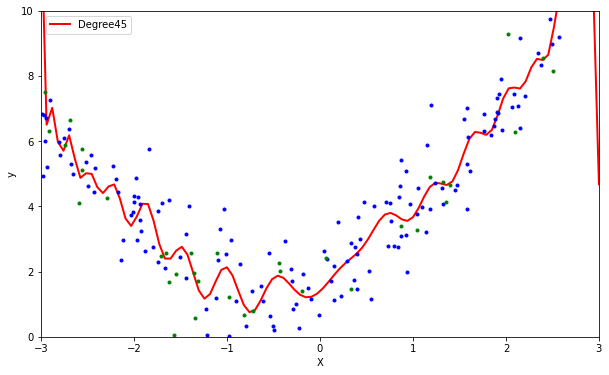

In [21]:
polynomail_regression(45)


More than One input columns

In [22]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100, 1)
# z  = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2


In [23]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()


In [24]:
lr = LinearRegression()
lr.fit(np.array([x, y]).reshape(100, 2), z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1, 100),
                  yGrid.ravel().reshape(1, 100))).T

z_final = lr.predict(final).reshape(10, 10)


In [25]:
import plotly.graph_objects as go
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.show()


In [26]:
X_multi = np.array([x, y]).reshape(100, 2)
X_multi.shape


(100, 2)

In [29]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)


In [30]:
print("Input", poly.n_input_features_)
print(("Output", poly.n_output_features_))
print("Powers\n", poly.powers_)


Input 2
('Output', 6)
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


c:\Users\dhanr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning:

The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.



In [31]:
X_multi_trans.shape


(100, 6)

In [32]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)


LinearRegression()

In [33]:
X_test_multi = poly.transform(final)


In [34]:
z_final = lr.predict(X_multi_trans).reshape(10, 10)


In [35]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0, 35])))
fig.show()
